In [ ]:
import pandas as pd

# Load the dataset

df = pd.read_csv("/content/FDI_in_India (1).csv")

# Display the first few rows
print(df.head())

                     Sector  2000-01  2001-02  2002-03  2003-04  2004-05  \
0  METALLURGICAL INDUSTRIES    22.69    14.14    36.61     8.11   200.38   
1                    MINING     1.32     6.52    10.06    23.48     9.92   
2                     POWER    89.42   757.44    59.11    27.09    43.37   
3   NON-CONVENTIONAL ENERGY     0.00     0.00     1.70     4.14     1.27   
4           COAL PRODUCTION     0.00     0.00     0.00     0.04     0.00   

   2005-06  2006-07  2007-08  2008-09  2009-10  2010-11  2011-12  2012-13  \
0   149.13   169.94  1175.75   959.94   419.88  1098.14  1786.14  1466.23   
1     7.40     6.62   444.36    34.16   174.40    79.51   142.65    57.89   
2    72.69   157.15   988.68   907.66  1271.79  1271.77  1652.38   535.68   
3     1.35     2.44    58.82   125.88   622.52   214.40   452.17  1106.52   
4     9.14     1.30    14.08     0.22     0.00     0.00     0.00     0.00   

   2013-14  2014-15  2015-16  2016-17  
0   567.63   359.34   456.31  1440.18  


In [ ]:
# Clean data: Convert columns to numeric where applicable
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.info())  # Check data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sector   63 non-null     object 
 1   2000-01  63 non-null     float64
 2   2001-02  63 non-null     float64
 3   2002-03  63 non-null     float64
 4   2003-04  63 non-null     float64
 5   2004-05  63 non-null     float64
 6   2005-06  63 non-null     float64
 7   2006-07  63 non-null     float64
 8   2007-08  63 non-null     float64
 9   2008-09  63 non-null     float64
 10  2009-10  63 non-null     float64
 11  2010-11  63 non-null     float64
 12  2011-12  63 non-null     float64
 13  2012-13  63 non-null     float64
 14  2013-14  63 non-null     float64
 15  2014-15  63 non-null     float64
 16  2015-16  63 non-null     float64
 17  2016-17  63 non-null     float64
dtypes: float64(17), object(1)
memory usage: 9.0+ KB
None


Sector
SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)    59476.49
COMPUTER SOFTWARE & HARDWARE                                                                                           24669.49
CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects            24293.09
TELECOMMUNICATIONS                                                                                                     23946.01
AUTOMOBILE INDUSTRY                                                                                                    16673.92
                                                                                                                         ...   
PHOTOGRAPHIC RAW FILM AND PAPER                                                                                           67.28
COAL PRODUCTION                                                                                  

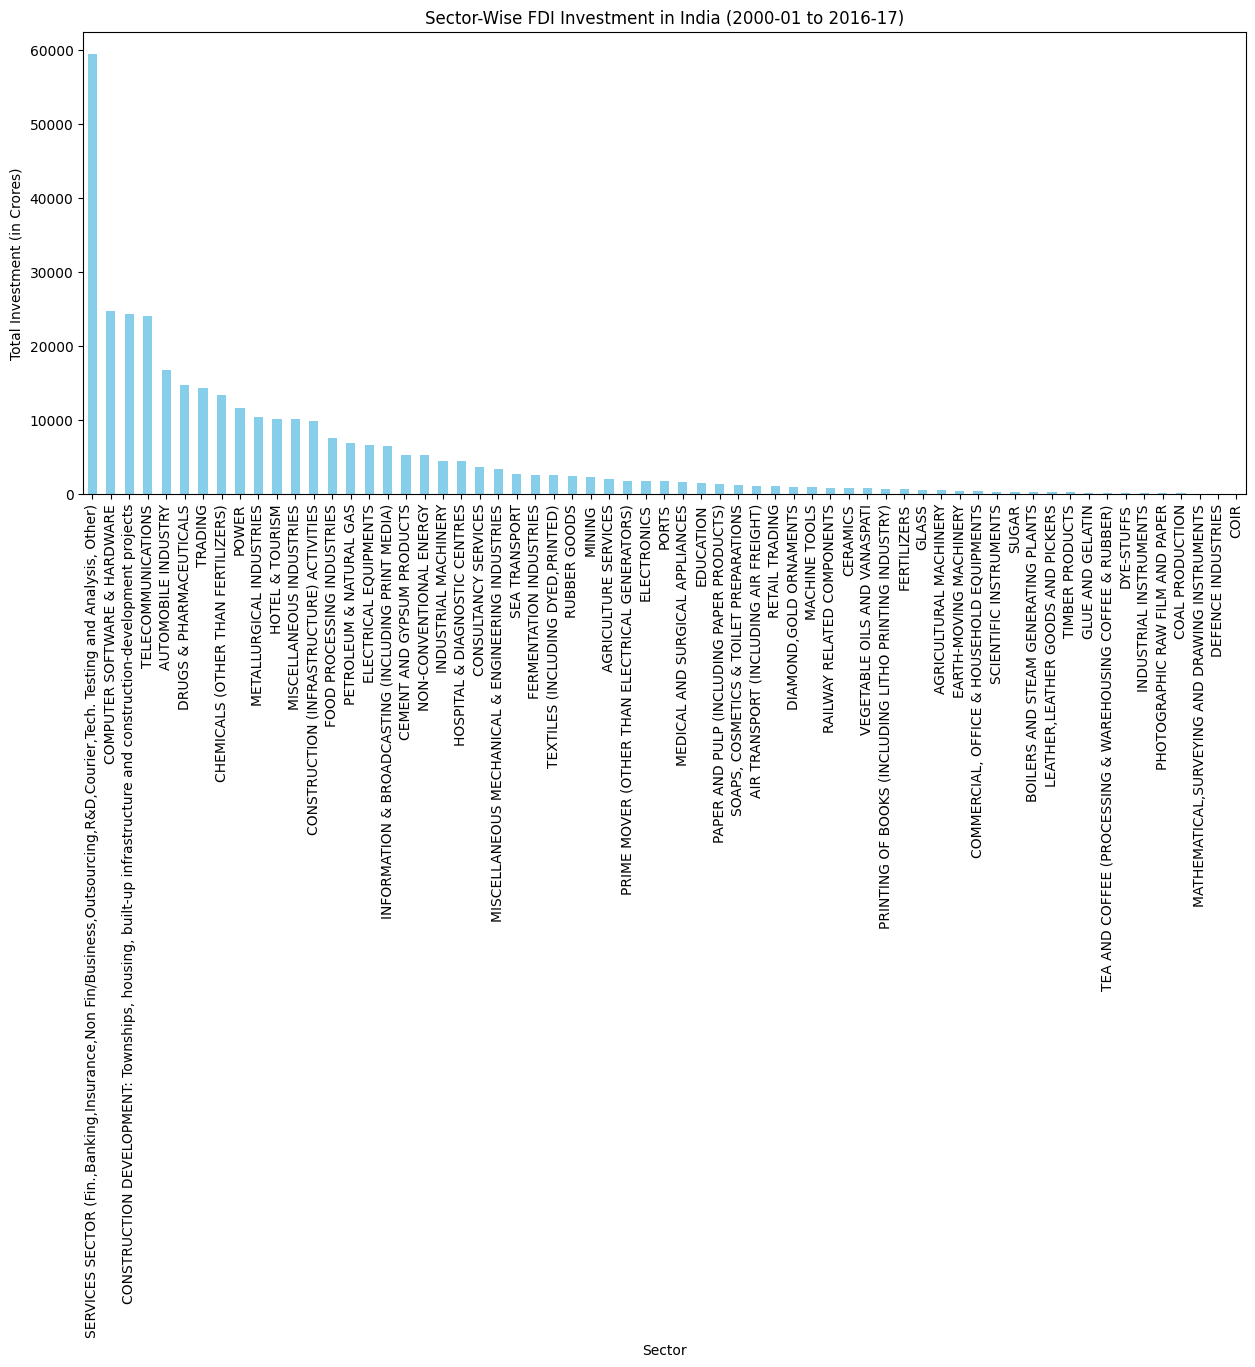

In [ ]:
# Aggregate data sector-wise
sector_analysis = df.set_index('Sector').sum(axis=1).sort_values(ascending=False)

print(sector_analysis)

# Plot sector-wise investment
import matplotlib.pyplot as plt

sector_analysis.plot(kind='bar', figsize=(15, 6), color='skyblue')
plt.title('Sector-Wise FDI Investment in India (2000-01 to 2016-17)')
plt.xlabel('Sector')
plt.ylabel('Total Investment (in Crores)')
plt.show()



2000-01     2378.71
2001-02     4027.69
2002-03     2704.32
2003-04     2187.85
2004-05     3218.69
2005-06     5539.75
2006-07    12491.76
2007-08     24575.4
2008-09    31395.96
2009-10    25834.38
2010-11    21383.07
2011-12    35120.78
2012-13    22423.59
2013-14    24299.32
2014-15    30930.47
2015-16    40000.99
2016-17    43478.26
dtype: object


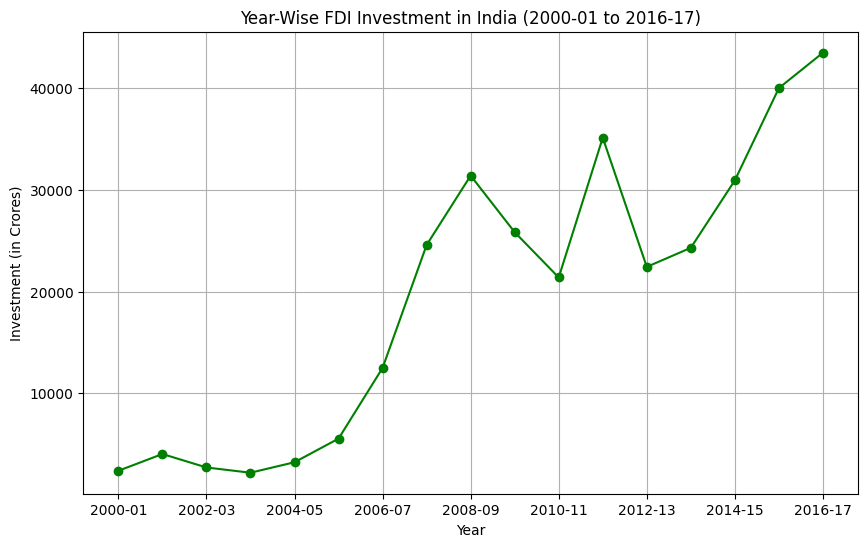

In [ ]:
# Aggregate data year-wise
year_analysis = df.sum(axis=0)[1:]  # Exclude the "Sector" column

print(year_analysis)

# Plot year-wise investment
year_analysis.plot(kind='line', figsize=(10, 6), marker='o', color='green')
plt.title('Year-Wise FDI Investment in India (2000-01 to 2016-17)')
plt.xlabel('Year')
plt.ylabel('Investment (in Crores)')
plt.grid(True)
plt.show()


In [ ]:
# Key metrics
total_investment = year_analysis.sum()
average_investment = year_analysis.mean()
top_sector = sector_analysis.idxmax()
top_sector_investment = sector_analysis.max()

print("Total Investment (2000-01 to 2016-17):", total_investment)
print("Average Annual Investment:", average_investment)
print("Top Sector:", top_sector)
print("Investment in Top Sector:", top_sector_investment)


Total Investment (2000-01 to 2016-17): 331990.99000000005
Average Annual Investment: 19528.881764705886
Top Sector: SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)
Investment in Top Sector: 59476.48999999999


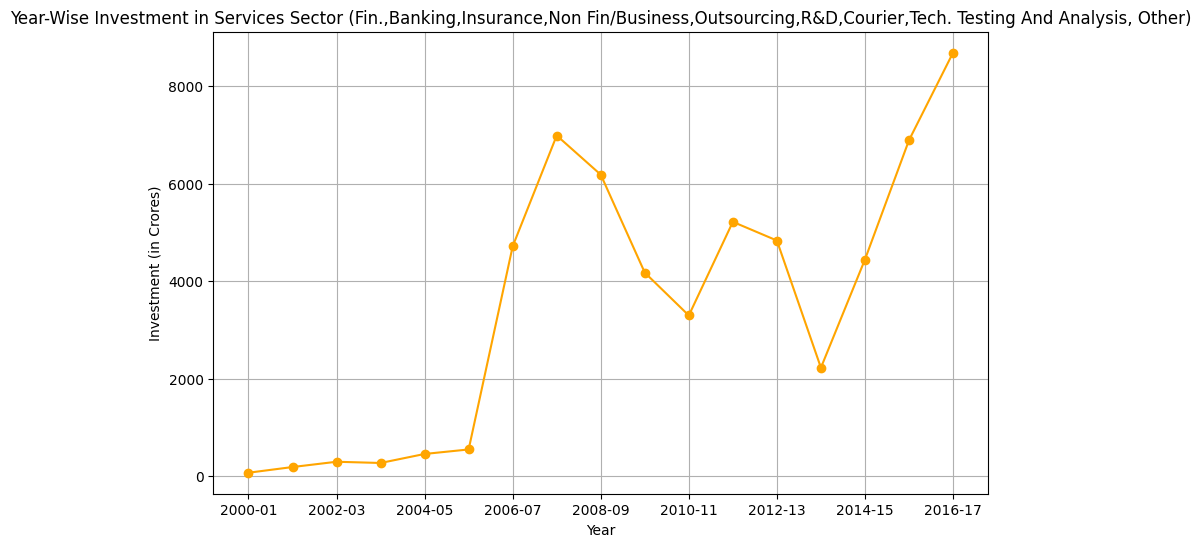

In [ ]:
# Select a specific sector
sector_name = 'SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)'  # Replace with your desired sector

# Convert sector_name and Sector column to lowercase and strip spaces
sector_name = sector_name.strip().lower()
df['Sector'] = df['Sector'].str.strip().str.lower()

sector_trend = df.set_index('Sector').loc[sector_name]

# Plot sector-wise trends
sector_trend.plot(kind='line', figsize=(10, 6), marker='o', color='orange')
plt.title(f'Year-Wise Investment in {sector_name.title()}') # Title case for display
plt.xlabel('Year')
plt.ylabel('Investment (in Crores)')
plt.grid(True)
plt.show()

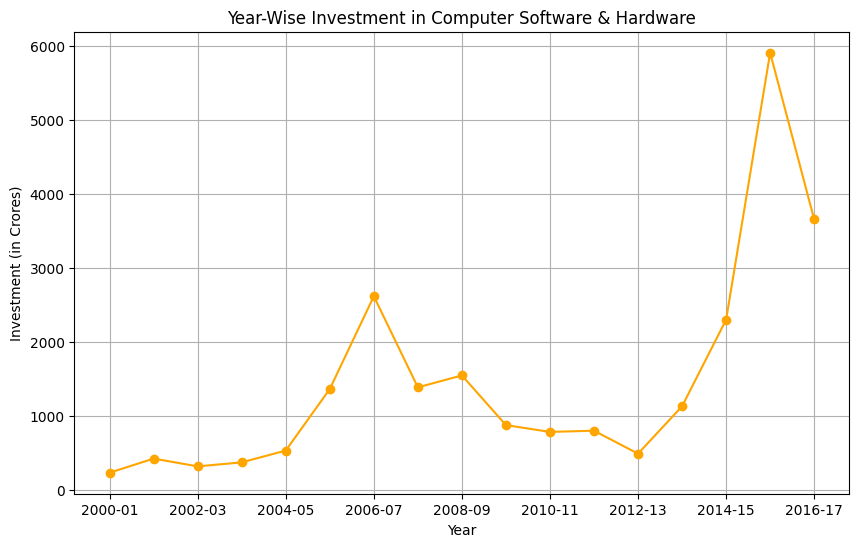

In [ ]:
# Select a specific sector
sector_name = 'COMPUTER SOFTWARE & HARDWARE'  # Replace with your desired sector

# Convert sector_name and Sector column to lowercase and strip spaces
sector_name = sector_name.strip().lower()
df['Sector'] = df['Sector'].str.strip().str.lower()

sector_trend = df.set_index('Sector').loc[sector_name]

# Plot sector-wise trends
sector_trend.plot(kind='line', figsize=(10, 6), marker='o', color='orange')
plt.title(f'Year-Wise Investment in {sector_name.title()}') # Title case for display
plt.xlabel('Year')
plt.ylabel('Investment (in Crores)')
plt.grid(True)
plt.show()

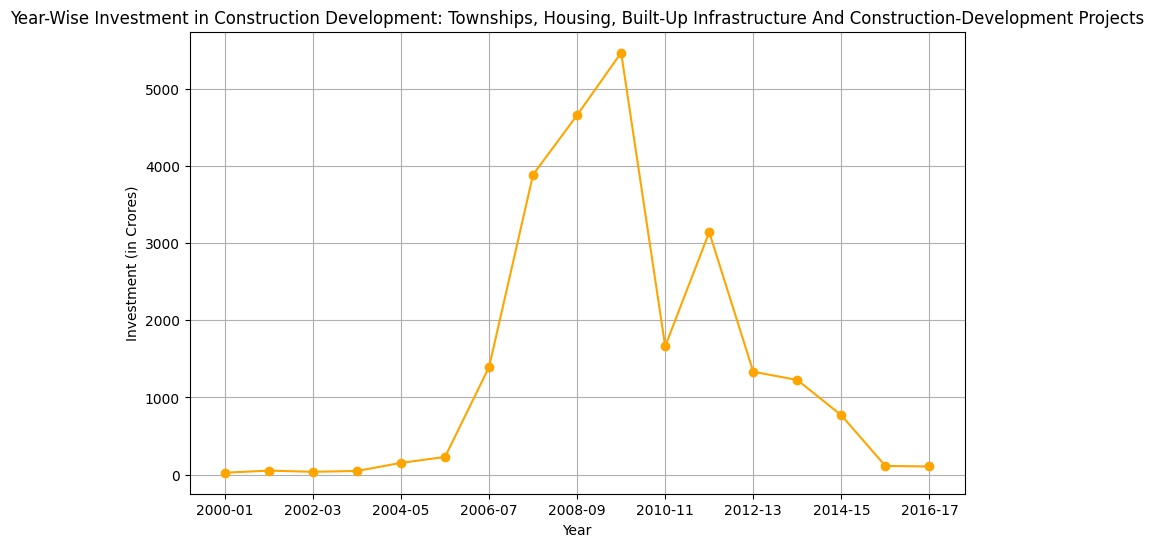

In [ ]:
# Select a specific sector
sector_name = 'CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects'  # Replace with your desired sector

# Convert sector_name and Sector column to lowercase and strip spaces
sector_name = sector_name.strip().lower()
df['Sector'] = df['Sector'].str.strip().str.lower()

sector_trend = df.set_index('Sector').loc[sector_name]

# Plot sector-wise trends
sector_trend.plot(kind='line', figsize=(10, 6), marker='o', color='orange')
plt.title(f'Year-Wise Investment in {sector_name.title()}') # Title case for display
plt.xlabel('Year')
plt.ylabel('Investment (in Crores)')
plt.grid(True)
plt.show()

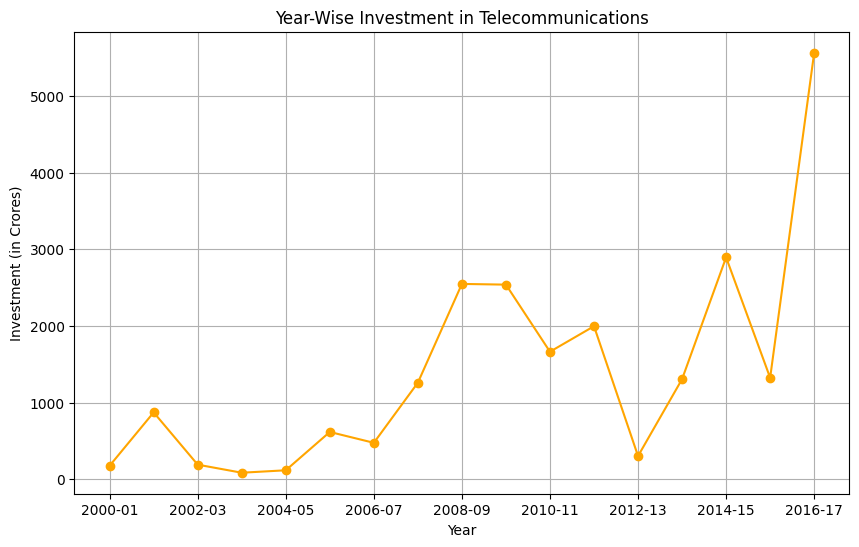

In [ ]:
# Select a specific sector
sector_name = 'TELECOMMUNICATIONS '  # Replace with your desired sector

# Convert sector_name and Sector column to lowercase and strip spaces
sector_name = sector_name.strip().lower()
df['Sector'] = df['Sector'].str.strip().str.lower()

sector_trend = df.set_index('Sector').loc[sector_name]

# Plot sector-wise trends
sector_trend.plot(kind='line', figsize=(10, 6), marker='o', color='orange')
plt.title(f'Year-Wise Investment in {sector_name.title()}') # Title case for display
plt.xlabel('Year')
plt.ylabel('Investment (in Crores)')
plt.grid(True)
plt.show()

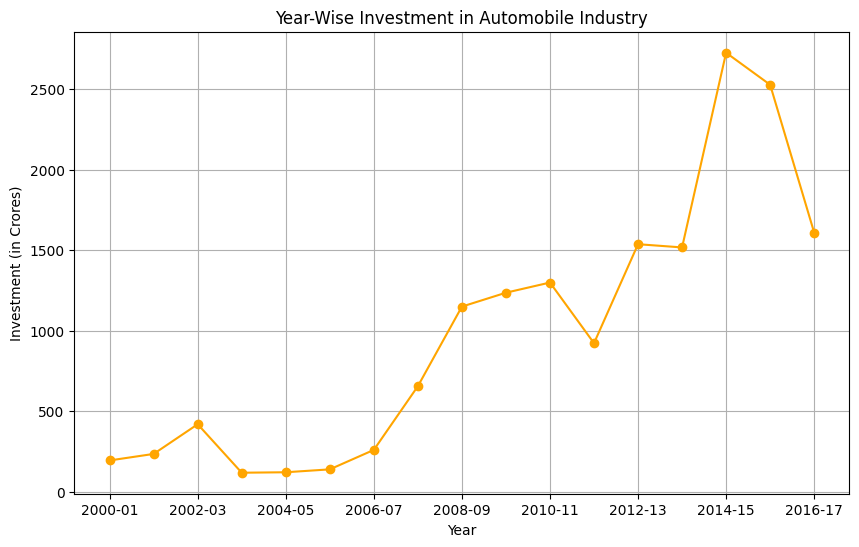

In [ ]:
# Select a specific sector
sector_name = 'AUTOMOBILE INDUSTRY'  # Replace with your desired sector

# Convert sector_name and Sector column to lowercase and strip spaces
sector_name = sector_name.strip().lower()
df['Sector'] = df['Sector'].str.strip().str.lower()

sector_trend = df.set_index('Sector').loc[sector_name]

# Plot sector-wise trends
sector_trend.plot(kind='line', figsize=(10, 6), marker='o', color='orange')
plt.title(f'Year-Wise Investment in {sector_name.title()}') # Title case for display
plt.xlabel('Year')
plt.ylabel('Investment (in Crores)')
plt.grid(True)
plt.show()

<Figure size 1500x500 with 0 Axes>

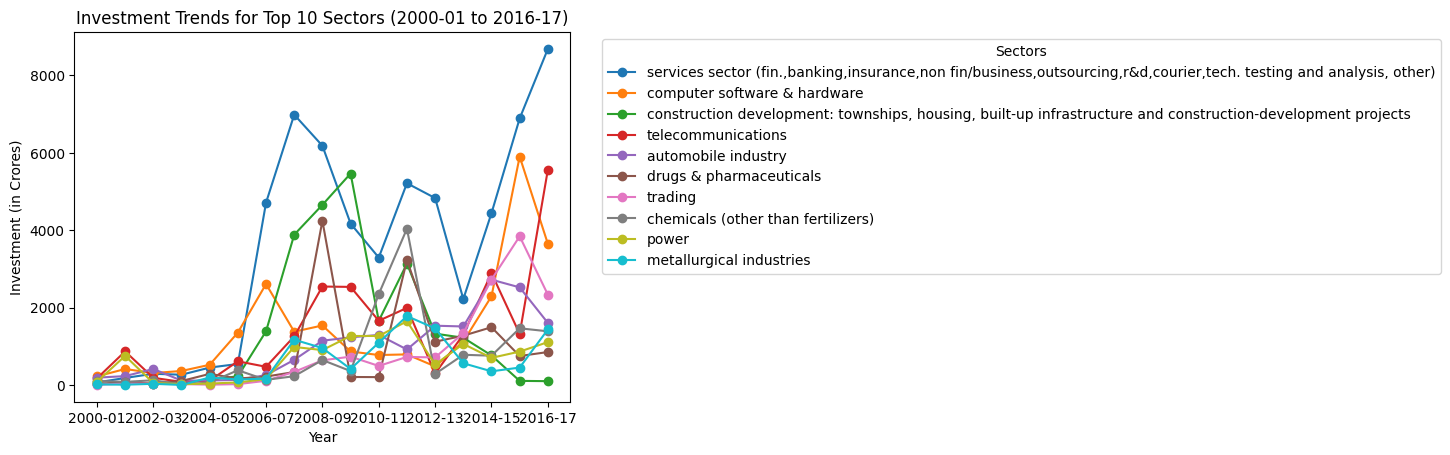

In [ ]:
# Top 10 sectors based on total investment
sector_totals = df.set_index('Sector').sum(axis=1).sort_values(ascending=False) #Calculate total investment for each sector
top_sectors = sector_totals.head(10).index #Selecting top 10 sectors  for better visibility

# Filter data for top sectors
df_top_sectors = df.set_index('Sector').loc[top_sectors]

# Plot investment trends for top sectors
plt.figure(figsize=(15, 5)) # Reduced figure size for better display
df_top_sectors.T.plot(marker='o')
plt.title('Investment Trends for Top 10 Sectors (2000-01 to 2016-17)') #Chart title changed to reflect selection of top 10 sectors
plt.axis('on')
plt.xlabel('Year')
plt.ylabel('Investment (in Crores)')
plt.legend(title='Sectors', bbox_to_anchor=(1.05,1), loc='upper left');

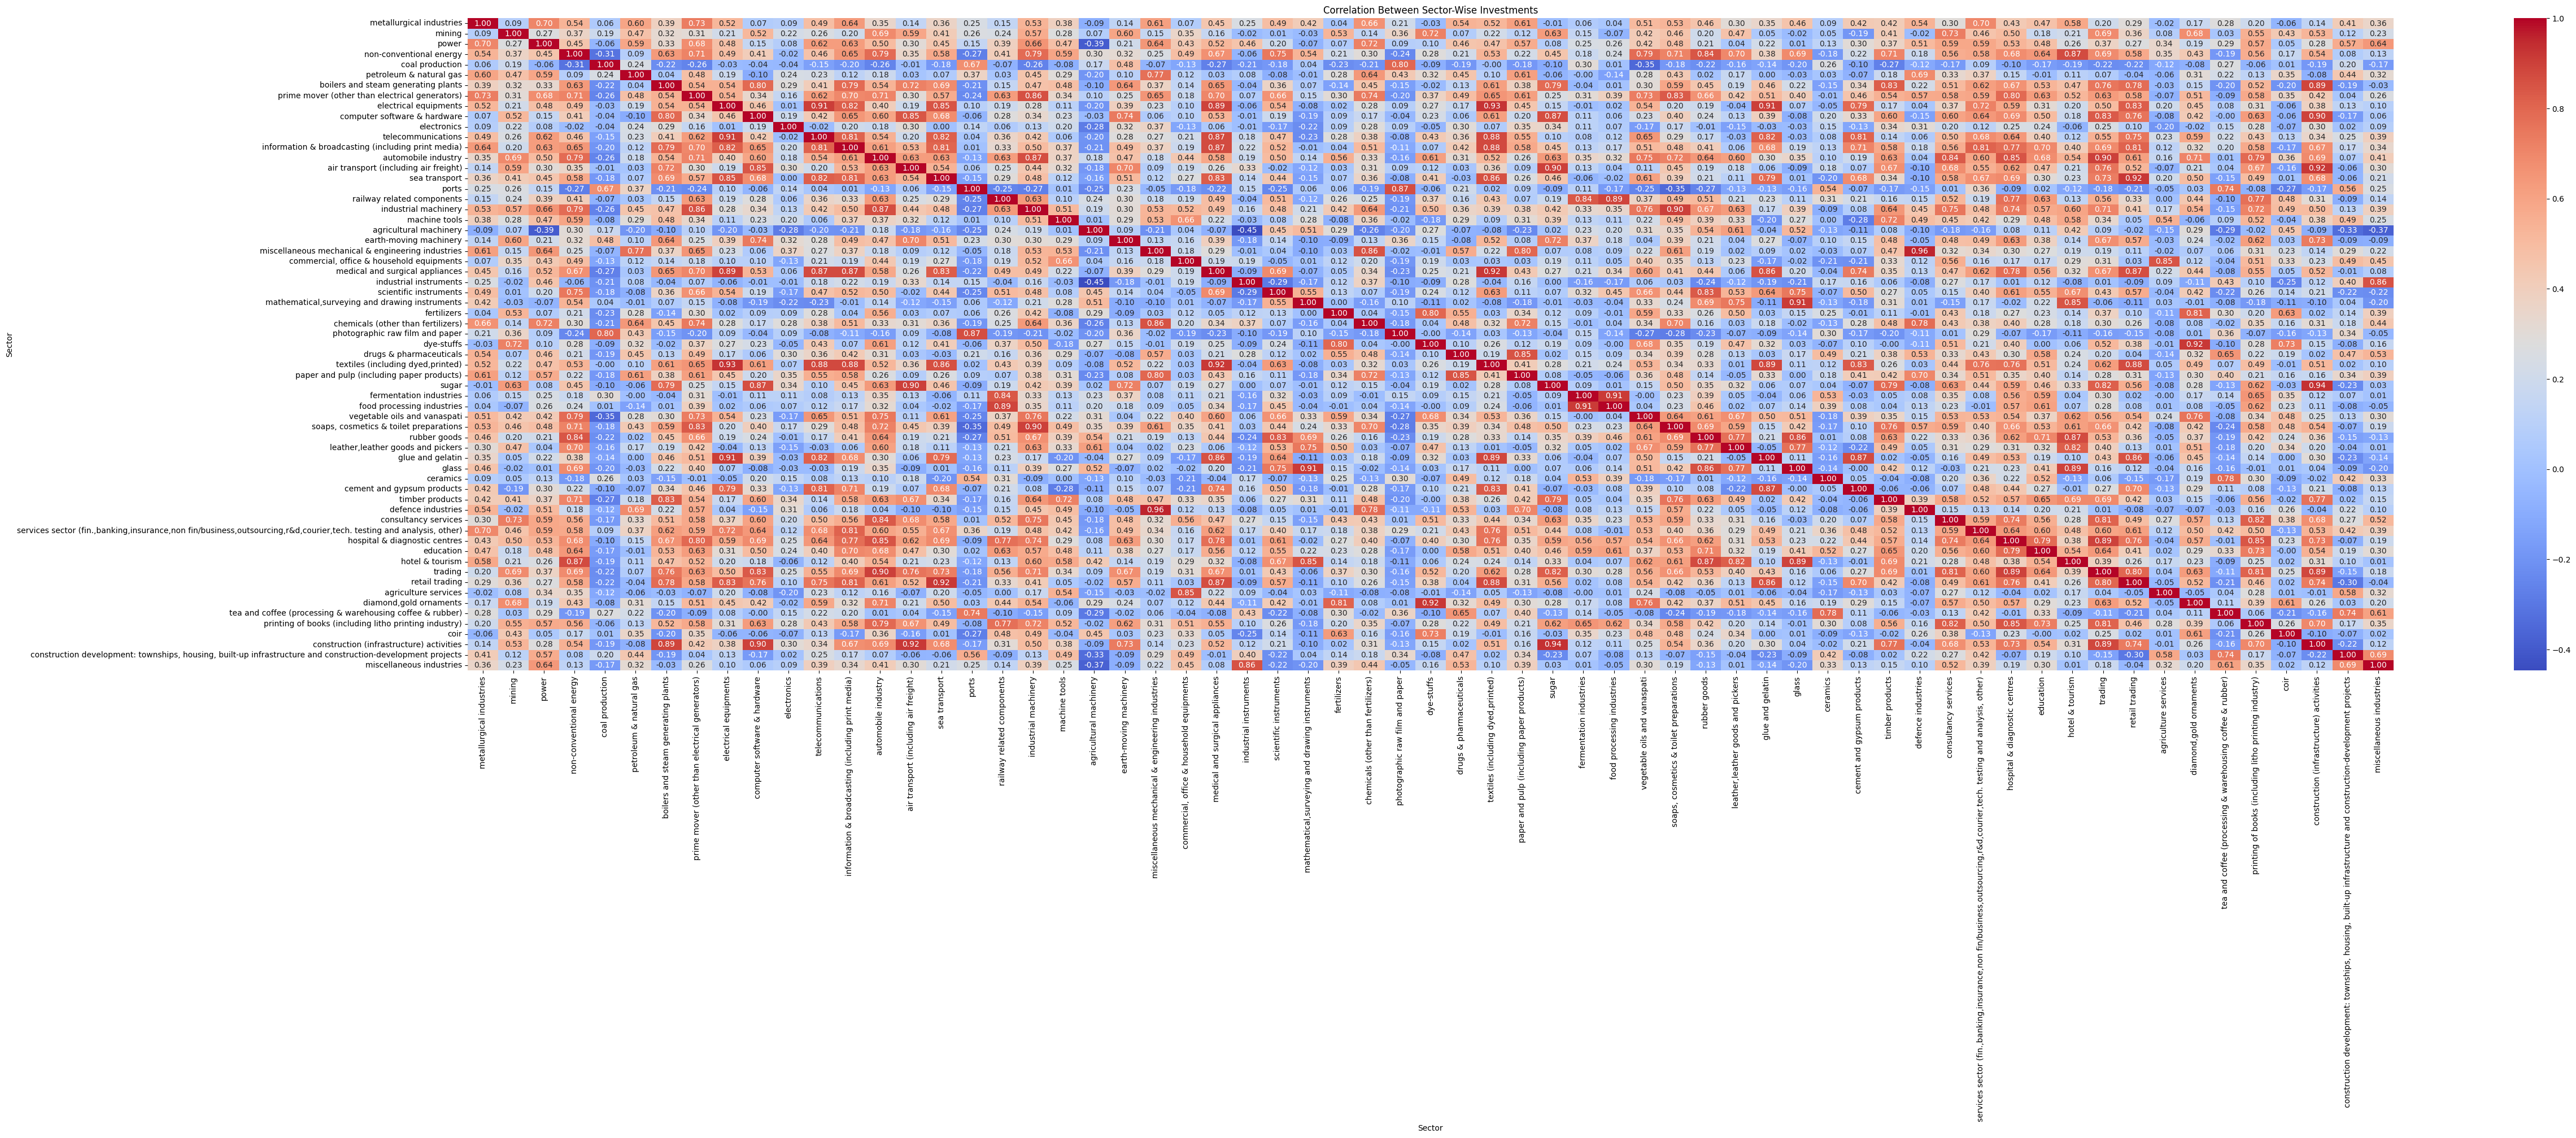

In [ ]:

import seaborn as sns # Import the seaborn library and alias it as 'sns'

# Transpose the dataset for correlation analysis
sector_yearly_data = df.set_index('Sector').T
sector_yearly_data = sector_yearly_data.iloc[1:]  # Remove non-numeric rows if any

# Compute the correlation matrix
correlation_matrix = sector_yearly_data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(55, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") # Now 'sns' is defined and can be used
plt.title('Correlation Between Sector-Wise Investments')
plt.show()